#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#### Read the file

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\insurance (1).csv")
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preporcessing

In [3]:
df.shape

(1338, 7)

#### Check Nulll Values

In [4]:
df.isna().sum().sum() 

0

#### Check Duplicates

In [5]:
df.duplicated().sum() 
df = df.drop_duplicates()
df.duplicated().sum() 

0

#### Check data types

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Check Inconsistent data

In [7]:
df.describe() 

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### EDA

In [8]:
cat_cols = df.dtypes[df.dtypes=='object'].index 
num_cols = df.dtypes[df.dtypes!='object'].index 

print(cat_cols)
print(num_cols) 

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


#### Catgeorical Data

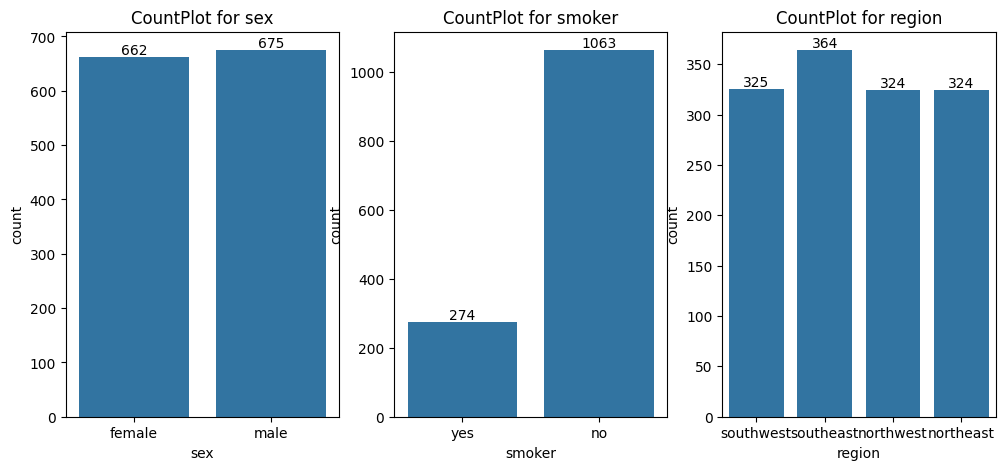

In [9]:
plt.figure(figsize=(12,5))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x = df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f"CountPlot for {cat_cols[i]}")
plt.tight_layout
plt.show() 

#### Numerical Data

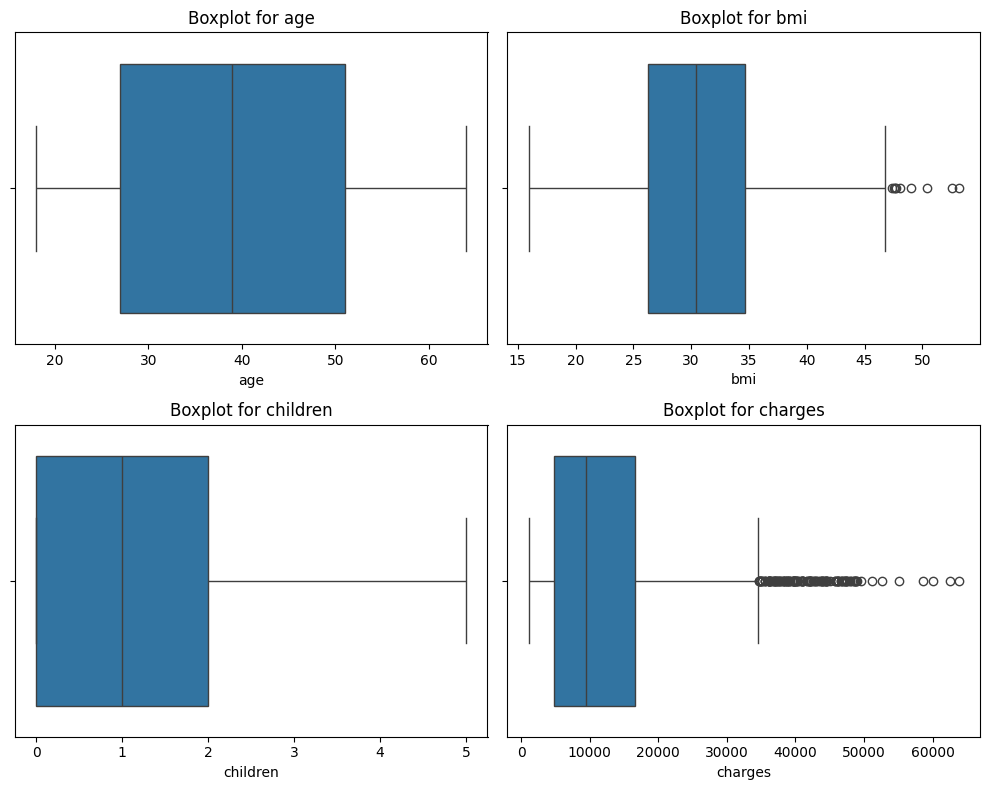

In [10]:
plt.figure(figsize=(10,8))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.tight_layout() 
plt.show() 

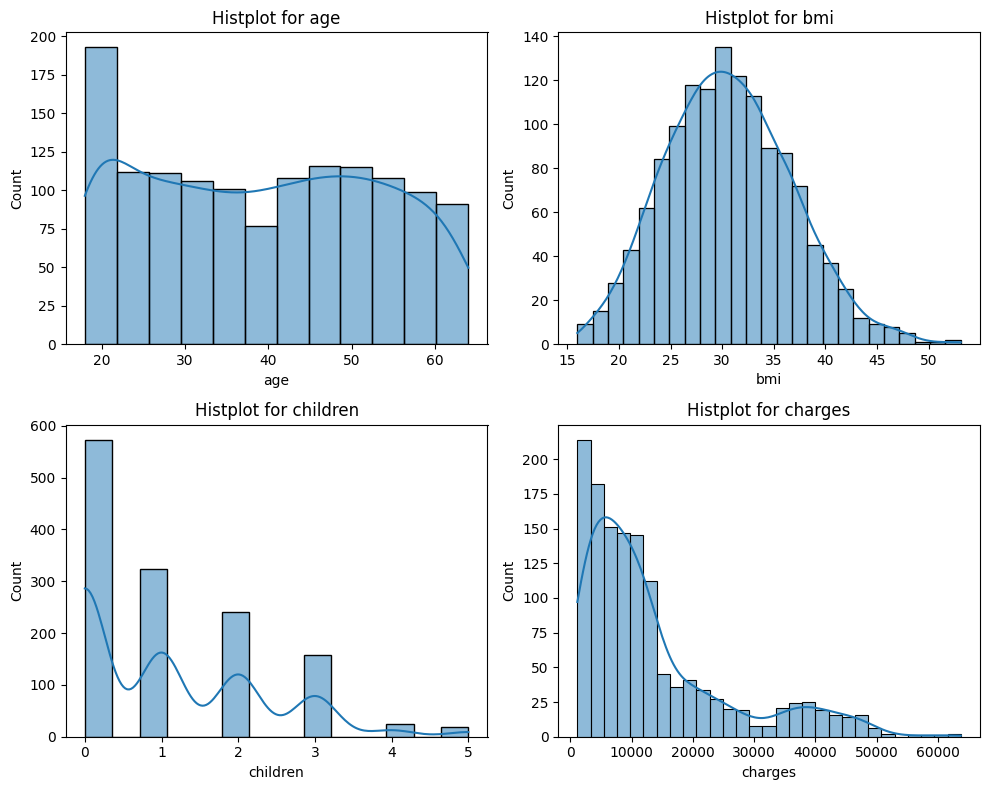

In [11]:
plt.figure(figsize=(10,8))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    ax = sns.histplot(x = df[num_cols[i]], kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
plt.tight_layout() 
plt.show()  

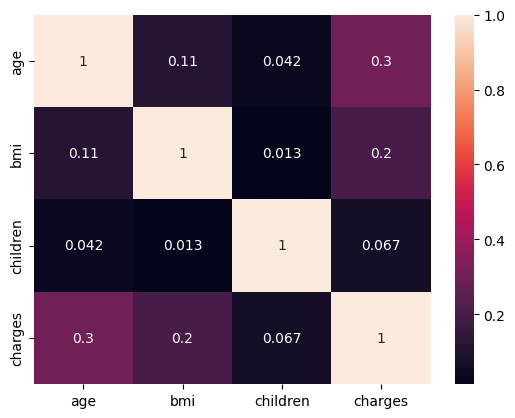

In [12]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show() 

#### Outlier Treatment - Cap

In [13]:
a = df[num_cols].describe(percentiles=[0.01,0.05,0.1,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,5%,10%,50%,95%,97%,98%,99%,max
age,18.0000,18.00000,18.00000,19.00000,39.0000,62.0000,63.000000,63.000000,64.000000,64.00000
bmi,15.9600,17.89420,21.24800,22.99000,30.4000,41.1080,42.455200,43.920800,46.411200,53.13000
children,0.0000,0.00000,0.00000,0.00000,1.0000,3.0000,4.000000,4.000000,5.000000,5.00000
charges,1121.8739,1252.95744,1767.49292,2358.52481,9386.1613,41210.0498,44495.190584,46677.324238,48537.796878,63770.42801


#### Outliers Detection

In [14]:
print(df[df['bmi']>46.411200].shape)
print(df[df['charges']>48537.796878].shape)

(14, 7)
(14, 7)


#### Handle the Outliers

In [15]:
df1 = df.copy() 

In [16]:
df['bmi'] = np.where(df['bmi']>46.411200,46.411200,df['bmi'])
df['charges'] = np.where(df['charges']>48537.796878,48537.796878,df['charges'])

In [17]:
a1 = df.describe(percentiles=[0.01,0.05,0.1,0.5,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,5%,10%,50%,95%,97%,98%,99%,max
age,18.0000,18.00000,18.00000,19.00000,39.0000,62.0000,63.000000,63.000000,64.000000,64.000000
bmi,15.9600,17.89420,21.24800,22.99000,30.4000,41.1080,42.455200,43.920800,46.335168,46.411200
children,0.0000,0.00000,0.00000,0.00000,1.0000,3.0000,4.000000,4.000000,5.000000,5.000000
charges,1121.8739,1252.95744,1767.49292,2358.52481,9386.1613,41210.0498,44495.190584,46677.324238,48530.512736,48537.796878


#### Encode the Catgeorical Features

In [18]:
print(cat_cols) 

Index(['sex', 'smoker', 'region'], dtype='object')


In [19]:
for i in cat_cols:
    print(i,df[i].value_counts(), df[i].nunique()) 

sex sex
male      675
female    662
Name: count, dtype: int64 2
smoker smoker
no     1063
yes     274
Name: count, dtype: int64 2
region region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64 4


In [20]:
df['sex'] = df['sex'].replace({'male':1,'female':0})
df['smoker'] = df['smoker'].replace({'yes':1, 'no':0})

print(df['sex'].value_counts())
print(df['smoker'].value_counts())  

sex
1    675
0    662
Name: count, dtype: int64
smoker
0    1063
1     274
Name: count, dtype: int64


In [21]:
df = pd.get_dummies(data=df, columns=['region'], drop_first=True, dtype=int)

print(df.shape)
print(df.columns)

(1337, 9)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [22]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

#### Select x and y

In [23]:
x = df.drop('charges', axis=1)
y = df['charges']

print(x.shape)
print(y.shape) 

(1337, 8)
(1337,)


#### Split the data into train and test

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(935, 8)
(402, 8)
(935,)
(402,)


#### Create Function to Evaluate the Model

In [25]:
def model_eval(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 =  model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res_df = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                          'Test_MAE':test_mae,'Test_MSE':test_mse,
                          'Test_RMSE':test_rmse},index=[mname])
    return res_df

#### Import ML models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 1) Linear Regression

In [27]:
lr = LinearRegression() 
lr_res = model_eval(lr,'Linear Regression') 
lr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear Regression,0.738654,0.787762,4060.936295,3.407092e+07,5837.029826


#### 2) Decision Tree Reg

In [29]:
dt = DecisionTreeRegressor(max_depth= 10, max_features= None, min_samples_leaf= 16, min_samples_split= 13) 
dt_res = model_eval(dt,'Decision Tree Regression') 
dt_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Decision Tree Regression,0.873715,0.88112,2578.315374,1.908405e+07,4368.529431


#### 3) Random Forest Regression

In [31]:
rf = RandomForestRegressor(bootstrap= True, max_depth= None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 200)
rf_res = model_eval(rf,'Random Forest Regressor')  
rf_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Random Forest Regressor,0.90631,0.88341,2409.321432,1.871641e+07,4326.24683


In [32]:
all_res = pd.concat([lr_res,dt_res,rf_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear Regression,0.738654,0.787762,4060.936295,3.407092e+07,5837.029826
Decision Tree Regression,0.873715,0.881120,2578.315374,1.908405e+07,4368.529431
Random Forest Regressor,0.906310,0.883410,2409.321432,1.871641e+07,4326.246830


#### Save the Model

In [33]:
import pickle

In [34]:
# pickle.dump(lr,open("D:\PYTHON1\Data Science Project 1\\lr.pkl","wb"))
# pickle.dump(dt,open("D:\PYTHON1\Data Science Project 1\\dt.pkl","wb"))
# pickle.dump(rf,open("D:\PYTHON1\Data Science Project 1\\rf.pkl","wb"))